<a href="https://colab.research.google.com/github/darrsshill/finance/blob/main/Copy_of_Algo_trading_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  2 of 2 completed


✅ Data downloaded successfully!

Ticker           AMZN       ORCL
Date                            
2023-01-03  85.820000  80.668526
2023-01-04  85.139999  81.400826
2023-01-05  83.120003  81.237015
2023-01-06  86.080002  82.537811
2023-01-09  87.360001  83.582352
🔗 Correlation between ORCL & AMZN: 0.35


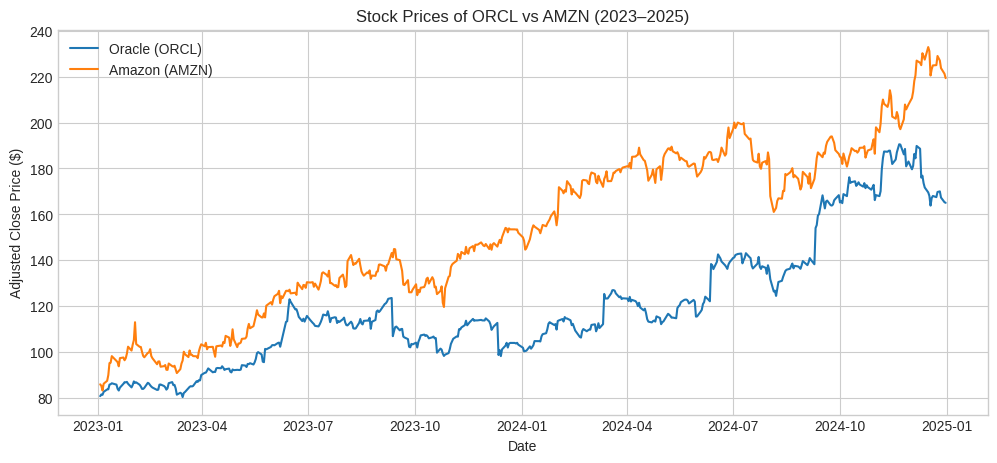

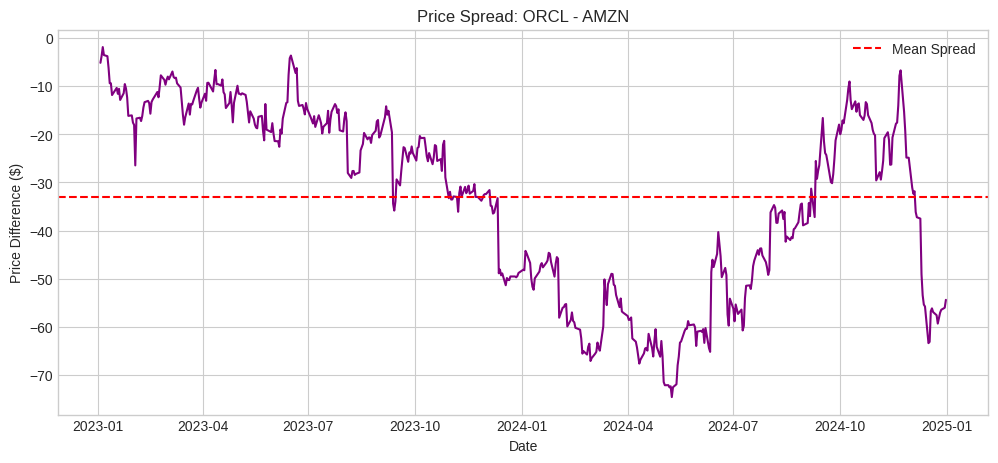

Mean Spread: -33.05
Std Dev of Spread: 19.17


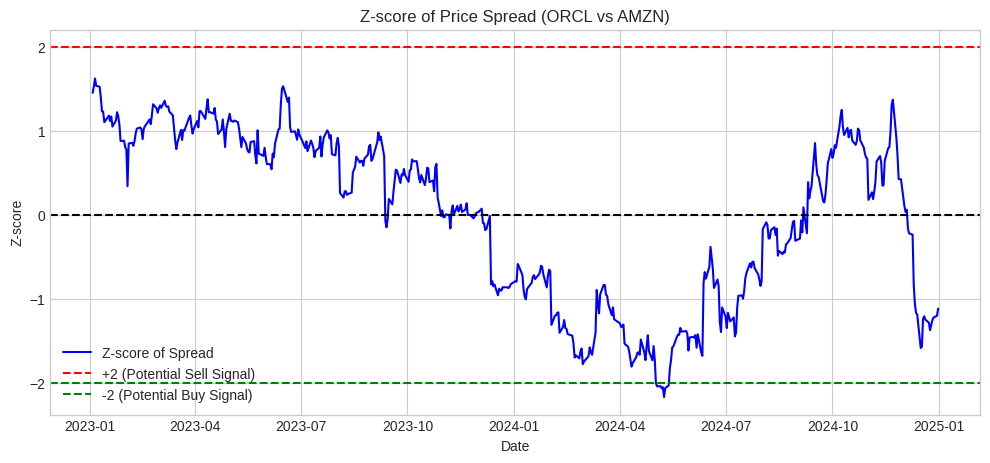

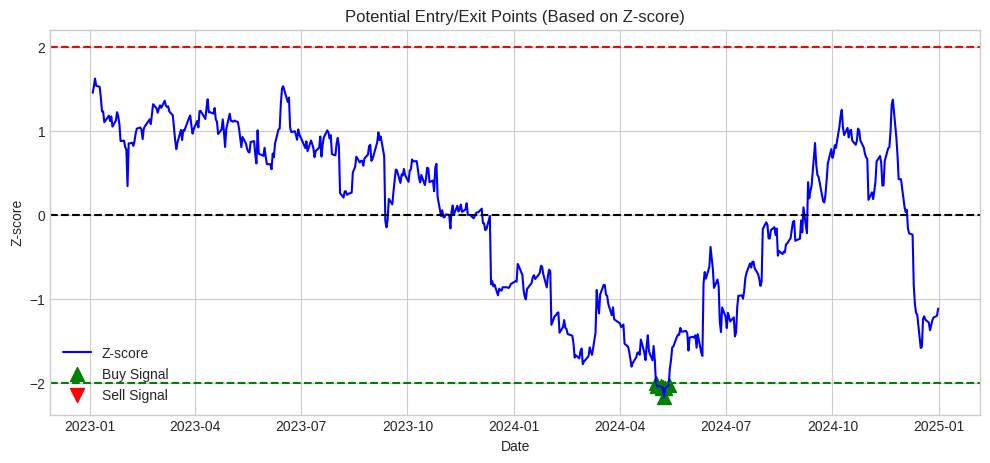


📈 SUMMARY REPORT
-------------------------
Correlation (ORCL, AMZN): 0.35
Mean Spread: -33.05
Std Dev Spread: 19.17
Number of Buy Signals: 8
Number of Sell Signals: 0

✅ Steps 1–4 completed. Ready for report submission!

📋 TRADE LOG (first 10 rows):
        Date                        Action    Zscore
0 2024-05-02  Enter LONG ORCL / SHORT AMZN -2.003992
1 2024-06-18                 Exit Position -0.379080


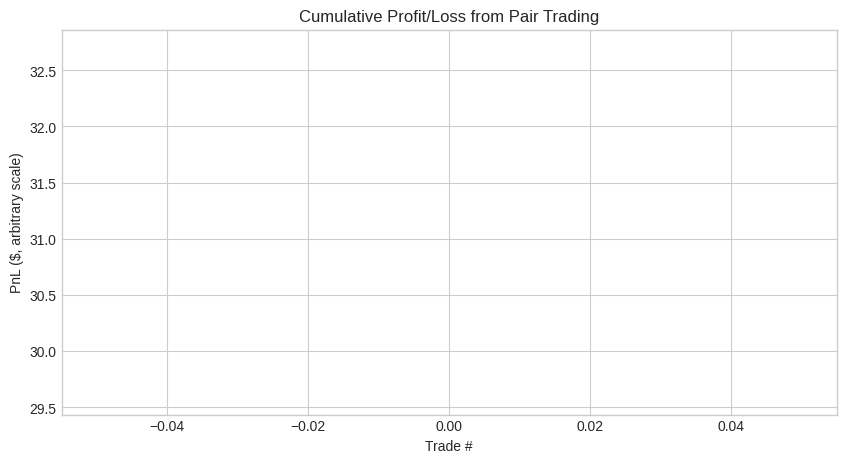


💰 Backtest Summary
--------------------
Total Trades Executed: 1
Total PnL (raw units): 31.15
Average PnL per Trade: 31.15

🧠 STRATEGY INSIGHTS & RISKS
------------------------------
✅ Works best when both ORCL & AMZN remain correlated and mean-reverting.
⚠️ Breaks when one stock diverges structurally (e.g., company-specific news).
⚠️ Transaction costs and slippage can erase small profits.
💡 Improvement ideas:
   - Use z-score of log(price ratio) instead of raw spread.
   - Optimize thresholds (e.g., ±1.5σ entry, 0σ exit).
   - Include stop-loss or volatility filter.
   - Use rolling correlation window (30/60 days) to adapt to changing dynamics.

✅ Steps 5 – 7 completed. Full project ready for submission!


In [ ]:
ORC# 📊 Pair Trading Project: Oracle (ORCL) vs Amazon (AMZN)
# Author: <Darshil>
!pip install yfinance pandas matplotlib seaborn --quiet

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
tickers = ["ORCL", "AMZN"]
data = yf.download(tickers, start="2023-01-01", end="2025-01-01", auto_adjust=True)["Close"]
data.dropna(inplace=True)
print("✅ Data downloaded successfully!\n")
print(data.head())

# Step 2: Calculating Daily Returns + Correlation

returns = data.pct_change().dropna()
corr = returns["ORCL"].corr(returns["AMZN"])
print(f"🔗 Correlation between ORCL & AMZN: {corr:.2f}")

# Plot price comparison
plt.figure(figsize=(12,5))
plt.plot(data["ORCL"], label="Oracle (ORCL)")
plt.plot(data["AMZN"], label="Amazon (AMZN)")
plt.title("Stock Prices of ORCL vs AMZN (2023–2025)")
plt.xlabel("Date")
# Update ylabel
plt.ylabel("Adjusted Close Price ($)")
plt.legend()
plt.show()

# Step 3: Calculating Price Spread
spread = data["ORCL"] - data["AMZN"]

plt.figure(figsize=(12,5))
plt.plot(spread, color="purple")
plt.title("Price Spread: ORCL - AMZN")
plt.xlabel("Date")
plt.ylabel("Price Difference ($)")
plt.axhline(spread.mean(), color="red", linestyle="--", label="Mean Spread")
plt.legend()
plt.show()

print(f"Mean Spread: {spread.mean():.2f}")
print(f"Std Dev of Spread: {spread.std():.2f}")

# Step 4: Calculating Z-score of Spread (Standardized)

zscore = (spread - spread.mean()) / spread.std()

plt.figure(figsize=(12,5))
plt.plot(zscore, label="Z-score of Spread", color="blue")
plt.axhline(0, color="black", linestyle="--")
plt.axhline(2, color="red", linestyle="--", label="+2 (Potential Sell Signal)")
plt.axhline(-2, color="green", linestyle="--", label="-2 (Potential Buy Signal)")
plt.title("Z-score of Price Spread (ORCL vs AMZN)")
plt.xlabel("Date")
plt.ylabel("Z-score")
plt.legend()
plt.show()

# Step 5: Interpretation / Simple Signal Visualization

signals = pd.DataFrame(index=zscore.index)
signals["zscore"] = zscore
signals["Buy Signal"] = np.where(zscore < -2, 1, 0)
signals["Sell Signal"] = np.where(zscore > 2, -1, 0)

plt.figure(figsize=(12,5))
plt.plot(zscore, color="blue", label="Z-score")
plt.scatter(signals.index[signals["Buy Signal"]==1],
            zscore[signals["Buy Signal"]==1],
            color="green", label="Buy Signal", marker="^", s=100)
plt.scatter(signals.index[signals["Sell Signal"]==-1],
            zscore[signals["Sell Signal"]==-1],
            color="red", label="Sell Signal", marker="v", s=100)
plt.axhline(0, color="black", linestyle="--")
plt.axhline(2, color="red", linestyle="--")
plt.axhline(-2, color="green", linestyle="--")
plt.title("Potential Entry/Exit Points (Based on Z-score)")
plt.xlabel("Date")
plt.ylabel("Z-score")
plt.legend()
plt.show()
# Step 6: Summary Output

print("\n📈 SUMMARY REPORT")
print("-------------------------")
print(f"Correlation (ORCL, AMZN): {corr:.2f}")
print(f"Mean Spread: {spread.mean():.2f}")
print(f"Std Dev Spread: {spread.std():.2f}")
print(f"Number of Buy Signals: {signals['Buy Signal'].sum()}")
print(f"Number of Sell Signals: {abs(signals['Sell Signal'].sum())}")

# Define Entry and Exit Rules

capital = 100_000      # total capital
position_value = 0.10   # trade 10% of capital each signal
position = 0            # +1 = long spread, -1 = short spread, 0 = flat
entry_orcl = entry_amzn = 0
pnl = 0.0
pnl_list = []
trade_log = []

for date in zscore.index:
    z = zscore.loc[date]
    orcl_price = data.loc[date, "ORCL"]
    amzn_price = data.loc[date, "AMZN"]

    # --- Entry ---
    if position == 0:
        if z < -2:  # Long ORCL, Short AMZN
            position = 1
            entry_orcl, entry_amzn = orcl_price, amzn_price
            trade_log.append((date, "Enter LONG ORCL / SHORT AMZN", z))
        elif z > 2:  # Short ORCL, Long AMZN
            position = -1
            entry_orcl, entry_amzn = orcl_price, amzn_price
            trade_log.append((date, "Enter SHORT ORCL / LONG AMZN", z))

    # --- Exit (mean reversion) ---
    elif position != 0 and abs(z) < 0.5:
        # compute PnL
        if position == 1:
            trade_pnl = (orcl_price - entry_orcl) - (amzn_price - entry_amzn)
        else:
            trade_pnl = (entry_orcl - orcl_price) - (entry_amzn - amzn_price)

        trade_log.append((date, "Exit Position", z))
        pnl += trade_pnl
        pnl_list.append(pnl)
        position = 0

# Convert trade log to DataFrame
trades_df = pd.DataFrame(trade_log, columns=["Date", "Action", "Zscore"])
print("\n📋 TRADE LOG (first 10 rows):")
print(trades_df.head(10))

# STEP 6️⃣ Backtest Results

# Simple cumulative PnL plot
pnl_series = pd.Series(pnl_list)
plt.figure(figsize=(10,5))
plt.plot(pnl_series.cumsum(), color="teal")
plt.title("Cumulative Profit/Loss from Pair Trading")
plt.xlabel("Trade #")
plt.ylabel("PnL ($, arbitrary scale)")
plt.show()

print("\n💰 Backtest Summary")
print("--------------------")
print(f"Total Trades Executed: {len(trades_df)//2}")
print(f"Total PnL (raw units): {pnl:.2f}")
print(f"Average PnL per Trade: {pnl/((len(trades_df)//2) or 1):.2f}")

# STEP 7️⃣ Evaluating Strategy Risks & Insights

print("\n🧠 STRATEGY INSIGHTS & RISKS")
print("------------------------------")
print("✅ Works best when both ORCL & AMZN remain correlated and mean-reverting.")
print("⚠️ Breaks when one stock diverges structurally (e.g., company-specific news).")
print("⚠️ Transaction costs and slippage can erase small profits.")
print("💡 Improvement ideas:")
print("   - Use z-score of log(price ratio) instead of raw spread.")
print("   - Optimize thresholds (e.g., ±1.5σ entry, 0σ exit).")
print("   - Include stop-loss or volatility filter.")
print("   - Use rolling correlation window (30/60 days) to adapt to changing dynamics.")



In [ ]:
!pip install yfinance --upgrade --quiet